In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df3 = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df3 = df3.drop(['index'], axis = 1)
df4 = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)
df5 = pd.read_feather('export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df6 = pd.read_feather('export_WarnowChacko_feather', columns=None, use_threads=True)


In [3]:
df3.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)
df3.head(5)
df3['new_date'] = pd.to_datetime(df3['new_date'])
df3.set_index('new_date', inplace = True)
df3.head(5)


,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
new_date,,,,,,,,,,,,,,,
2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8


In [4]:
df4['new_date'] = pd.to_datetime(df4['new_date'])
df4 = df4[['new_date','PM2.5 (CF=1) ug/m3']]
df4.set_index('new_date', inplace = True)
df4 = df4[df4.index.isin(df3.index)]
df4.head(5)

,PM2.5 (CF=1) ug/m3
new_date,
2021-09-02 04:45:00,7.600000
2021-09-02 05:00:00,8.282857
2021-09-02 05:15:00,8.436250
2021-09-02 05:30:00,8.907143
2021-09-02 05:45:00,9.141250


In [5]:
df5['new_date'] = pd.to_datetime(df5['new_date'])
df5 = df5[['new_date','PM2.5 (CF=1) ug/m3']]
df5.set_index('new_date', inplace = True)
df5 = df5[df5.index.isin(df3.index)]
df5.head(5)

,PM2.5 (CF=1) ug/m3
new_date,
2021-09-02 04:45:00,8.567143
2021-09-02 05:00:00,9.157500
2021-09-02 05:15:00,9.065714
2021-09-02 05:30:00,9.797500
2021-09-02 05:45:00,9.164286


In [6]:
df6['new_date'] = pd.to_datetime(df6['new_date'])
df6 = df6[['new_date','PM2.5 (CF=1) ug/m3']]
df6.set_index('new_date', inplace = True)
df6 = df6[df6.index.isin(df3.index)]
df6.head(5)

,PM2.5 (CF=1) ug/m3
new_date,
2021-09-25 16:00:00,1.077500
2021-09-25 16:15:00,1.101429
2021-09-25 16:30:00,0.817500
2021-09-25 16:45:00,0.730000
2021-09-25 17:00:00,0.800000


In [7]:
temp_df = pd.merge(df4, df5, on = 'new_date')
temp_df.head(5)

,PM2.5 (CF=1) ug/m3_x,PM2.5 (CF=1) ug/m3_y
new_date,,
2021-09-02 04:45:00,7.600000,8.567143
2021-09-02 05:00:00,8.282857,9.157500
2021-09-02 05:15:00,8.436250,9.065714
2021-09-02 05:30:00,8.907143,9.797500
2021-09-02 05:45:00,9.141250,9.164286


In [8]:
temp_dfnew = pd.merge(temp_df, df6, on = 'new_date')
temp_dfnew.head(5)

,PM2.5 (CF=1) ug/m3_x,PM2.5 (CF=1) ug/m3_y,PM2.5 (CF=1) ug/m3
new_date,,,
2021-09-25 16:00:00,0.944286,0.900000,1.077500
2021-09-25 16:15:00,0.945000,0.865714,1.101429
2021-09-25 16:30:00,0.838571,1.101250,0.817500
2021-09-25 16:45:00,0.825000,0.818571,0.730000
2021-09-25 17:00:00,0.760000,0.723750,0.800000


In [9]:
final_df = df3.merge(temp_dfnew, on='new_date')
final_df.head(5)

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity,PM2.5 (CF=1) ug/m3_x,PM2.5 (CF=1) ug/m3_y,PM2.5 (CF=1) ug/m3
new_date,,,,,,,,,,,,,,,,,,
2021-09-25 16:00:00,301.88,412.95,0.26,5.27,28.23,1.63,2.85,3.91,7.90,7.90,1.06,5.53,62.1,989.9,48.7,0.944286,0.900000,1.077500
2021-09-25 16:15:00,305.64,411.10,0.22,5.06,27.92,1.51,2.81,4.03,7.82,7.82,1.02,5.28,61.2,990.1,49.5,0.945000,0.865714,1.101429
2021-09-25 16:30:00,305.33,411.10,0.26,4.66,28.77,1.27,2.27,3.23,6.23,6.23,0.85,4.92,60.6,990.5,49.8,0.838571,1.101250,0.817500
2021-09-25 16:45:00,293.65,409.71,-0.48,5.27,26.64,1.14,2.17,3.34,7.49,7.49,0.81,4.79,60.6,990.4,49.8,0.825000,0.818571,0.730000
2021-09-25 17:00:00,292.59,409.71,0.62,4.27,28.63,1.16,2.22,3.25,7.74,7.74,0.82,4.89,60.4,990.3,49.8,0.760000,0.723750,0.800000


In [10]:
df3.corr()

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
co_prescaled,1.000000,0.658231,-0.529999,0.377341,0.006306,0.046460,0.054285,0.055805,0.057833,0.062758,0.050289,-0.351779,-0.779595,0.312841,0.235390
CO2_prescaled,0.658231,1.000000,-0.442190,0.110216,0.263414,-0.148758,-0.080744,-0.035085,-0.004870,0.010514,-0.127398,-0.365647,-0.766456,0.173896,0.212554
no_prescaled,-0.529999,-0.442190,1.000000,0.084578,0.014401,0.204724,0.157325,0.115316,0.085762,0.066059,0.190252,0.938455,0.637481,-0.096258,-0.250214
no2_prescaled,0.377341,0.110216,0.084578,1.000000,0.114406,0.081402,0.062384,0.044075,0.048378,0.046150,0.075433,0.419605,-0.065527,0.263359,-0.223919
o3_prescaled,0.006306,0.263414,0.014401,0.114406,1.000000,-0.221654,-0.192928,-0.175131,-0.108317,-0.078156,-0.217065,0.051771,0.091613,0.126110,-0.682578
pm1_prescale,0.046460,-0.148758,0.204724,0.081402,-0.221654,1.000000,0.943740,0.855074,0.718460,0.648200,0.993371,0.214391,0.238508,-0.094014,0.199738
pm2_5_prescale,0.054285,-0.080744,0.157325,0.062384,-0.192928,0.943740,1.000000,0.977790,0.894604,0.836880,0.975098,0.164670,0.175847,-0.106094,0.179747
pm4_prescale,0.055805,-0.035085,0.115316,0.044075,-0.175131,0.855074,0.977790,1.000000,0.960395,0.916152,0.908764,0.120119,0.126367,-0.113953,0.170862
pm10_prescale,0.057833,-0.004870,0.085762,0.048378,-0.108317,0.718460,0.894604,0.960395,1.000000,0.985543,0.790908,0.094690,0.100068,-0.110418,0.113339
pm_total_prescale,0.062758,0.010514,0.066059,0.046150,-0.078156,0.648200,0.836880,0.916152,0.985543,1.000000,0.724961,0.075972,0.082373,-0.103734,0.093988


<AxesSubplot:>

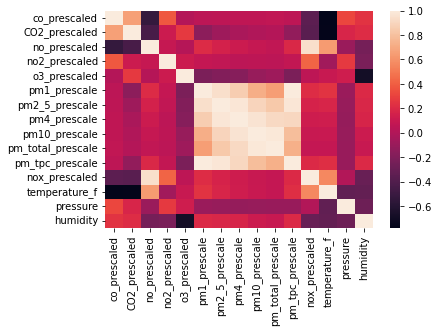

In [11]:
#Correlation heatmap for UIUC Sensor Data
sns.heatmap(df3.corr())

<AxesSubplot:>

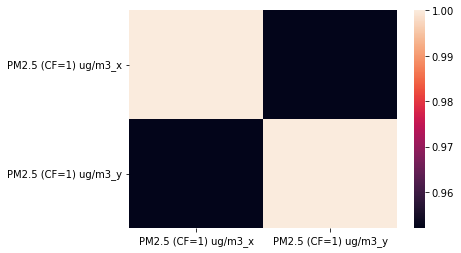

In [12]:
#Correlation heatmap for all Purple Air data
sns.heatmap(temp_df.corr())

<AxesSubplot:>

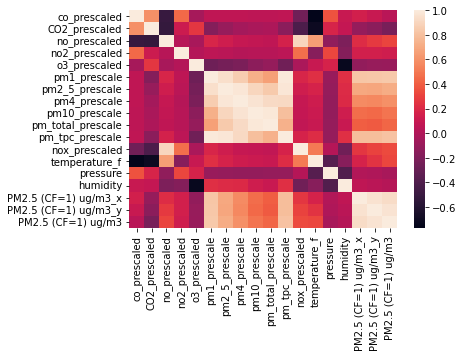

In [13]:
#Correlation heatmap for combined sensor data
sns.heatmap(final_df.corr())

In [14]:
a = final_df.corr()['PM2.5 (CF=1) ug/m3'].sort_values()

In [15]:
b = a.to_frame()

<AxesSubplot:>

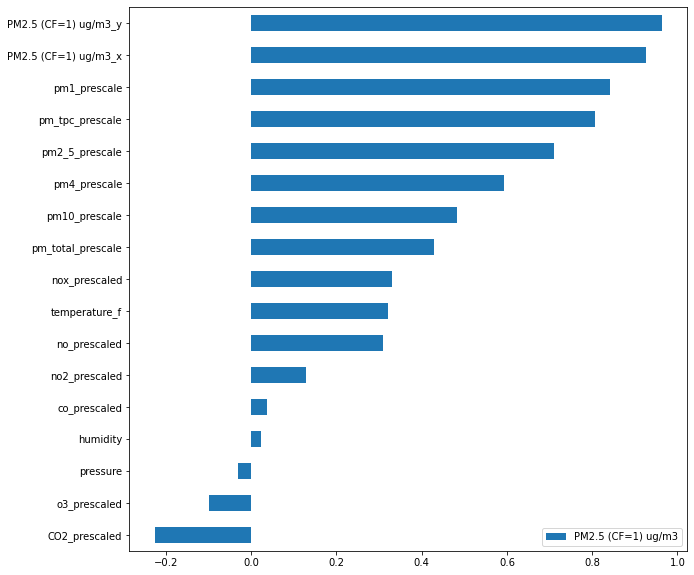

In [16]:
#Correlation of PM2.5 values from Purple air to other recorded variables
fig, ax = plt.subplots(figsize=(10,10))
b.drop('PM2.5 (CF=1) ug/m3').plot.barh(ax=ax)

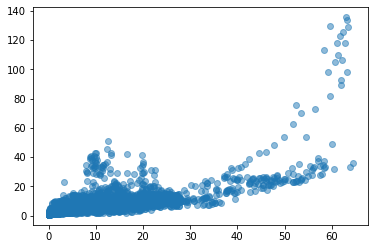

In [17]:
#Scatter plot showing correlation between purple air PC 2.5 values and UIUC sensor PM 2.5 values
plt.scatter(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'], alpha = 0.5)


In [18]:
#Covariance Matrix
np.cov(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'])

array([[90.60164456,         nan],
       [        nan,         nan]])

array([<AxesSubplot:xlabel='new_date'>, <AxesSubplot:xlabel='new_date'>],
      dtype=object)

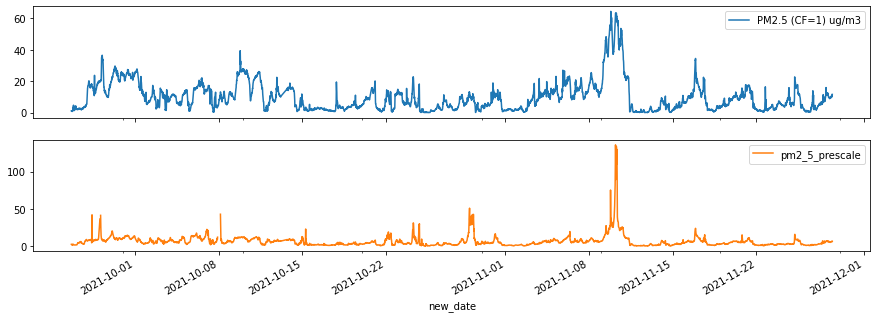

In [19]:
#Variation of PM 2.5 Values from Purple air and UIUC sensor over time
final_df[['PM2.5 (CF=1) ug/m3', 'pm2_5_prescale']].plot(subplots = True, figsize = (15,5), legend = True)

In [20]:
import xarray as xr

ds = xr.open_dataset('MERRA2_401.inst1_2d_lfo_Nx.20200930.nc4')
df = ds.to_dataframe()

In [48]:
#df.filter(['SPEEDLML'])

In [49]:
#df.shape

In [50]:
#df.index.names

In [24]:
ds

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2020-09-30 ... 2020-09-30T23:00:00
Data variables:
    HLML      (time, lat, lon) float32 46.29 46.29 46.29 ... 59.48 59.48 59.48
    PS        (time, lat, lon) float32 6.856e+04 6.856e+04 ... 1.012e+05
    QLML      (time, lat, lon) float32 6.138e-06 6.138e-06 ... 0.002649 0.002649
    SPEEDLML  (time, lat, lon) float32 7.709 7.709 7.709 ... 6.129 6.129 6.129
    TLML      (time, lat, lon) float32 209.6 209.6 209.6 ... 268.5 268.5 268.5
Attributes: (12/30)
    History:                           Re-processed file generated: Tue Nov  ...
    Comment:                           GMAO filename: d5124_m2_jan10.inst1_2d...
    Filename:                          MERRA2_401.inst1_2d_lfo_Nx.20200930.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/RCMZA6TL70BG
    RangeBeginningDate:                2020-09-30
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-09-30
    RangeEndingTime:                   23:00:00.000000

In [25]:
e = ds.loc[dict(lat="40.0", lon="-87.5")]
f = e.to_dataframe()

In [53]:
wind_df = f.reset_index()
#wind_df.set_index('time', inplace = True)
wind_df.head(5)

,time,lon,lat,HLML,PS,QLML,SPEEDLML,TLML
0,2020-09-30 00:00:00,-87.5,40.0,63.858303,98680.835938,0.005445,6.511623,287.754608
1,2020-09-30 01:00:00,-87.5,40.0,63.729668,98675.054688,0.005628,6.950104,287.143219
2,2020-09-30 02:00:00,-87.5,40.0,63.609135,98663.640625,0.005806,7.024870,286.569427
3,2020-09-30 03:00:00,-87.5,40.0,63.495087,98648.664062,0.005930,7.052386,286.034149
4,2020-09-30 04:00:00,-87.5,40.0,63.345947,98590.968750,0.006016,7.213359,285.348022


In [54]:
#wind_df['time']

In [55]:
df_clean = final_df.reset_index()
df_clean
filtered_df = df_clean.loc[(df_clean['new_date'] >= "2021-09-30 00:00:00") & (df_clean['new_date'] <= "2021-09-30 23:00:00")]
#filtered_df.set_index('new_date', inplace = True)

In [56]:
pd.options.mode.chained_assignment = None  # default='warn'
filtered_df['new_date'] = filtered_df['new_date'].dt.time
filtered_df.set_index("new_date", inplace = True)

In [57]:
wind_df['time'] = wind_df['time'].dt.time
wind_df.rename(columns={'time' : 'new_date'}, inplace = True)

In [58]:
wind_df.set_index("new_date", inplace = True)
wind_df.head(5)

,lon,lat,HLML,PS,QLML,SPEEDLML,TLML
new_date,,,,,,,
00:00:00,-87.5,40.0,63.858303,98680.835938,0.005445,6.511623,287.754608
01:00:00,-87.5,40.0,63.729668,98675.054688,0.005628,6.950104,287.143219
02:00:00,-87.5,40.0,63.609135,98663.640625,0.005806,7.024870,286.569427
03:00:00,-87.5,40.0,63.495087,98648.664062,0.005930,7.052386,286.034149
04:00:00,-87.5,40.0,63.345947,98590.968750,0.006016,7.213359,285.348022


In [59]:
filtered_df = filtered_df[filtered_df.index.isin(wind_df.index)]
filtered_df.head(5)

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity,PM2.5 (CF=1) ug/m3_x,PM2.5 (CF=1) ug/m3_y,PM2.5 (CF=1) ug/m3
new_date,,,,,,,,,,,,,,,,,,
00:00:00,318.20,442.09,13.84,6.07,20.55,9.26,11.05,12.36,14.75,14.75,4.76,19.91,66.4,992.8,73.0,26.86500,28.931429,24.204286
01:00:00,322.74,446.72,14.29,5.50,19.19,9.84,11.85,13.45,18.41,18.44,5.09,19.79,65.5,992.1,74.3,27.23500,29.781429,24.200000
02:00:00,326.35,449.03,15.97,5.93,16.54,9.14,10.77,11.94,15.87,15.87,4.74,21.90,64.8,992.9,74.6,23.79500,26.144286,23.320000
03:00:00,341.77,447.64,14.54,6.56,15.08,10.16,12.03,13.24,14.86,14.86,5.21,21.10,66.0,992.9,76.0,23.33625,27.142857,20.875714
04:00:00,346.71,442.09,20.44,7.66,15.02,11.35,13.70,15.01,21.01,21.44,5.84,28.10,70.5,993.4,74.0,24.76250,27.467143,21.600000


In [60]:
windspeed_df = pd.merge(filtered_df, wind_df, on = 'new_date')
windspeed_df.head(5)

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,...,PM2.5 (CF=1) ug/m3_x,PM2.5 (CF=1) ug/m3_y,PM2.5 (CF=1) ug/m3,lon,lat,HLML,PS,QLML,SPEEDLML,TLML
new_date,,,,,,,,,,,,,,,,,,,,,
00:00:00,318.20,442.09,13.84,6.07,20.55,9.26,11.05,12.36,14.75,14.75,...,26.86500,28.931429,24.204286,-87.5,40.0,63.858303,98680.835938,0.005445,6.511623,287.754608
01:00:00,322.74,446.72,14.29,5.50,19.19,9.84,11.85,13.45,18.41,18.44,...,27.23500,29.781429,24.200000,-87.5,40.0,63.729668,98675.054688,0.005628,6.950104,287.143219
02:00:00,326.35,449.03,15.97,5.93,16.54,9.14,10.77,11.94,15.87,15.87,...,23.79500,26.144286,23.320000,-87.5,40.0,63.609135,98663.640625,0.005806,7.024870,286.569427
03:00:00,341.77,447.64,14.54,6.56,15.08,10.16,12.03,13.24,14.86,14.86,...,23.33625,27.142857,20.875714,-87.5,40.0,63.495087,98648.664062,0.005930,7.052386,286.034149
04:00:00,346.71,442.09,20.44,7.66,15.02,11.35,13.70,15.01,21.01,21.44,...,24.76250,27.467143,21.600000,-87.5,40.0,63.345947,98590.968750,0.006016,7.213359,285.348022


<h6> PM 2.5 vs Temperature </h6>

Text(0, 0.5, 'PC 2.5')

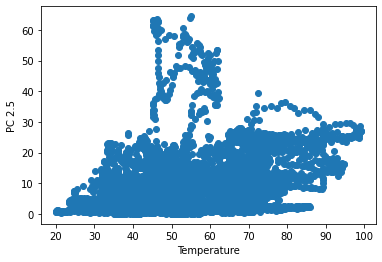

In [34]:
#Test plot showing variation of PC 2.5 with Temperature
plt.scatter(final_df['temperature_f'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Temperature')
plt.ylabel('PC 2.5')

<AxesSubplot:xlabel='temperature_f', ylabel='PM2.5 (CF=1) ug/m3'>

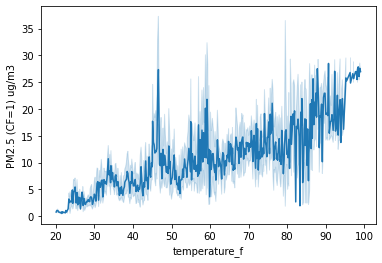

In [36]:
temperature_df = final_df.reset_index()
temperature_df = temperature_df[['new_date','PM2.5 (CF=1) ug/m3', 'temperature_f']]
sns.lineplot(data = temperature_df, x="temperature_f", y="PM2.5 (CF=1) ug/m3")

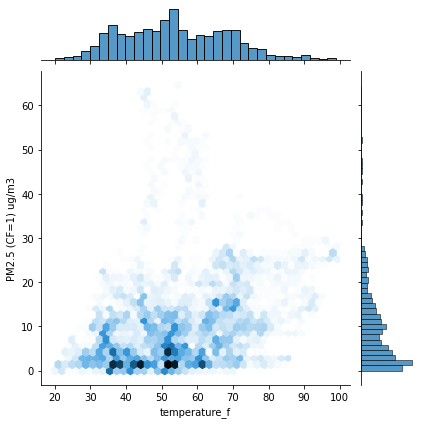

In [38]:
sns.jointplot(x = "temperature_f", y="PM2.5 (CF=1) ug/m3", data=temperature_df, kind="hex")

<h6> PM 2.5 vs Humidity </h6>

Text(0, 0.5, 'PC 2.5')

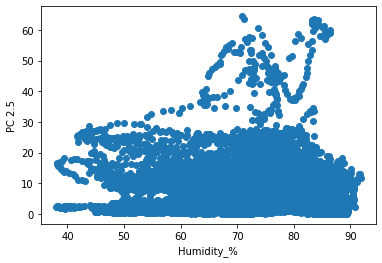

In [39]:
#Scatter plot showing variation of PC2.5 with Humidity
plt.scatter(final_df['humidity'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Humidity_%')
plt.ylabel('PC 2.5')

<AxesSubplot:xlabel='humidity', ylabel='PM2.5 (CF=1) ug/m3'>

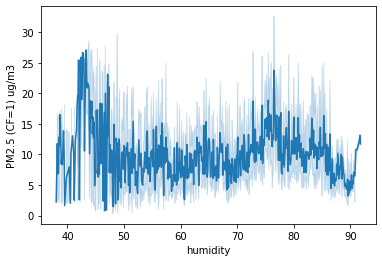

In [40]:
humidity_df = final_df.reset_index()
humidity_df = humidity_df[['new_date','PM2.5 (CF=1) ug/m3', 'humidity']]
sns.lineplot(data = humidity_df, x="humidity", y="PM2.5 (CF=1) ug/m3")

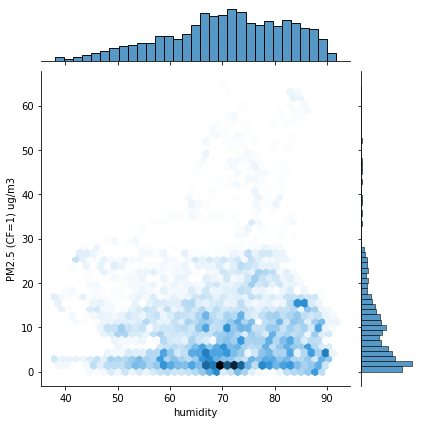

In [42]:
sns.jointplot(x = "humidity", y="PM2.5 (CF=1) ug/m3", data=humidity_df, kind="hex")

<h6> PM 2.5 vs Wind Speed </h6>

Text(0, 0.5, 'PC 2.5')

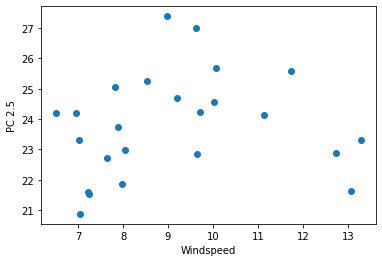

In [43]:
#Scatter plot showing variation of PC2.5 with Wind speed on Sep 30
plt.scatter(windspeed_df['SPEEDLML'], windspeed_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Windspeed')
plt.ylabel('PC 2.5')

<AxesSubplot:xlabel='SPEEDLML', ylabel='PM2.5 (CF=1) ug/m3'>

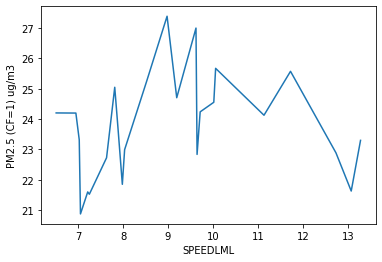

In [44]:
sns.lineplot(data = windspeed_df, x="SPEEDLML", y="PM2.5 (CF=1) ug/m3")

<AxesSubplot:>

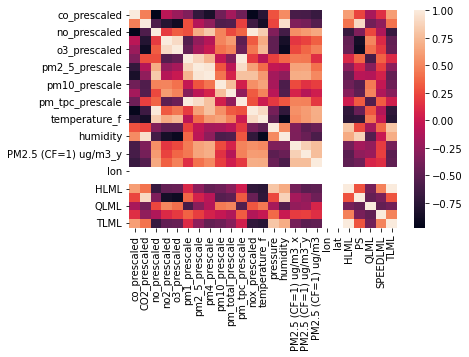

In [47]:
sns.heatmap(windspeed_df.corr())

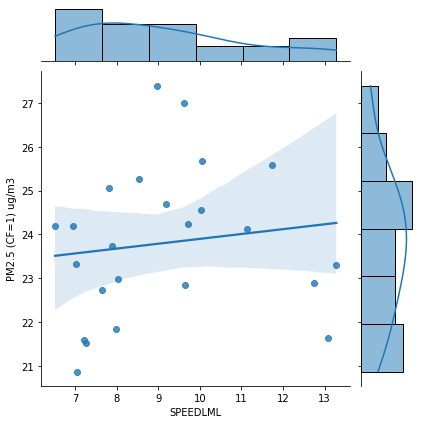

In [62]:
sns.jointplot(x="SPEEDLML", y="PM2.5 (CF=1) ug/m3", data=windspeed_df, kind='reg')